<a href="https://colab.research.google.com/github/mohsensafa/TensorFlow/blob/master/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Import necessary libraries and the mnist dataset*

In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout

#load the data set
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#simplify the data by dividing them by 255 as each pixel has a value between 0-255, so by deviding them all by 255 we will have values between 0-1
x_train = x_train/255
x_test = x_test/255

#using the tf.keras.utils.to_categorical function we make the labels as one-hot labels as a part of our preprocessing
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

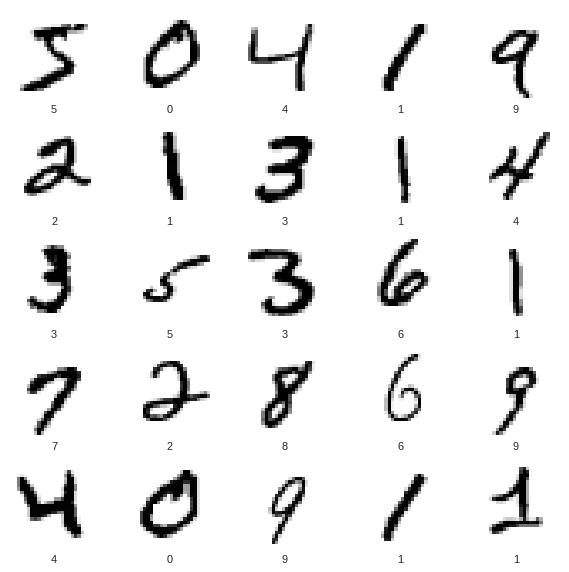

In [16]:
#plot the first 25 images from the training data set and their respective labels just to see how they look like
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

# *Build and compile the model*

In [0]:
#building our model
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))

#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
#train the model using our train data and their respective labels, and also put a side some part of it for validation
model.fit(x_train, y_train_cat, epochs = 10, batch_size = 32, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
54000/54000 [==============================] - 16s 288us/sample - loss: 0.2525 - acc: 0.9227 - val_loss: 0.1124 - val_acc: 0.9672
Epoch 2/10
54000/54000 [==============================] - 14s 267us/sample - loss: 0.1257 - acc: 0.9623 - val_loss: 0.0997 - val_acc: 0.9700
Epoch 3/10
54000/54000 [==============================] - 14s 254us/sample - loss: 0.0984 - acc: 0.9701 - val_loss: 0.0725 - val_acc: 0.9790
Epoch 4/10
54000/54000 [==============================] - 13s 233us/sample - loss: 0.0813 - acc: 0.9760 - val_loss: 0.0820 - val_acc: 0.9763
Epoch 5/10
54000/54000 [==============================] - 13s 240us/sample - loss: 0.0708 - acc: 0.9791 - val_loss: 0.0764 - val_acc: 0.9787
Epoch 6/10
54000/54000 [==============================] - 13s 232us/sample - loss: 0.0670 - acc: 0.9799 - val_loss: 0.0757 - val_acc: 0.9770
Epoch 7/10
54000/54000 [==============================] -

# *Test the model*

In [19]:
#calculate the loss and accuracy of our test data
loss, acc = model.evaluate(x_test, y_test_cat)
print('loss = ', loss, 'acc = ', acc)

10000/10000 [==============================] - 1s 82us/sample - loss: 0.0928 - acc: 0.9797
loss =  0.09283213225508516 acc =  0.9797


In [23]:
#check the prediction of our model and compare them with the true labels
predicted_classes = model.predict_classes(x_test[:25])
print(predicted_classes)
print(y_test[:25])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


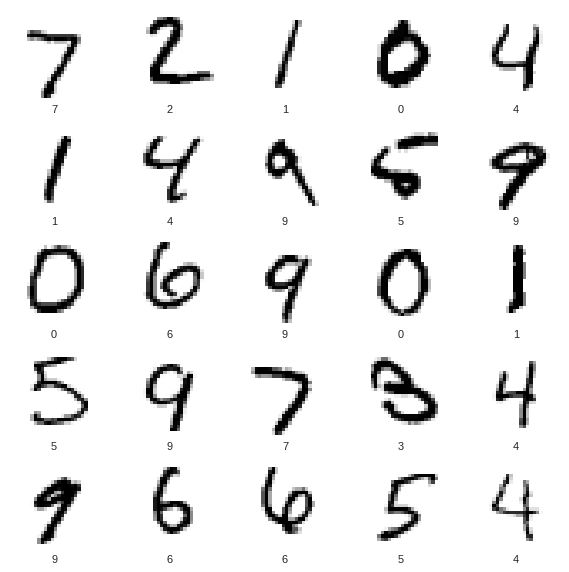

In [24]:
#plot the first 25 test images and their predicted labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(predicted_classes[i])
plt.show()